### Tarea 1 - Simulación

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import skew, kurtosis
from scipy.stats import gamma

#### Cargar datos

In [2]:
ruta = './consumo_hamb.csv'
data_frame = pd.read_csv(ruta, header=None, names=['Consumo (kg)'])
data_frame

,Consumo (kg)
0,490.40
1,708.02
2,559.67
3,605.58
4,529.02
...,...
249,514.96
250,794.97
251,634.73
252,514.59


#### Análisis Exploratorio

In [3]:
descriptivos = data_frame.describe()
descriptivos.loc['Asimetria'] = data_frame['Consumo (kg)'].skew()
descriptivos.loc['Curtosis'] = data_frame['Consumo (kg)'].kurt()
descriptivos

,Consumo (kg)
count,254.000000
mean,588.762283
std,105.002327
min,300.480000
25%,519.870000
50%,597.280000
75%,659.220000
max,865.790000
Asimetria,-0.144406
Curtosis,-0.372586


<function matplotlib.pyplot.show(close=None, block=None)>

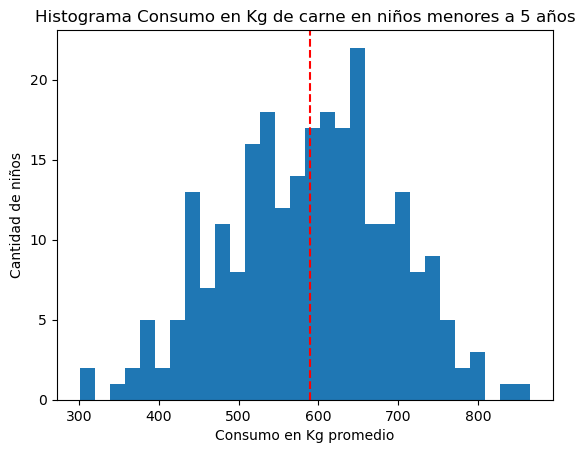

In [4]:
plt.hist(data_frame, bins=30)
plt.title('Histograma Consumo en Kg de carne en niños menores a 5 años')
plt.ylabel('Cantidad de niños')
plt.xlabel('Consumo en Kg promedio')
plt.axvline(x=descriptivos['Consumo (kg)'][1], color='red', linestyle='--', label='Media')
plt.show

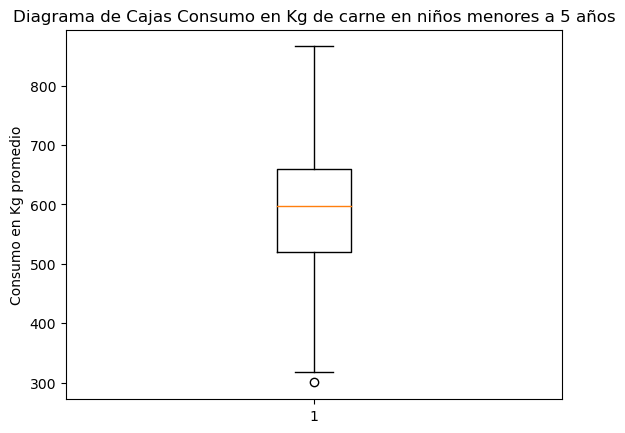

In [5]:
plt.boxplot(data_frame)
plt.title('Diagrama de Cajas Consumo en Kg de carne en niños menores a 5 años')
plt.ylabel('Consumo en Kg promedio')
plt.show()

#### Hallazgos

Cuando se realiza el histograma de los datos, se puede ver siguen aparenetemente una distribución normal. Realizando los calculos de la asimetría, se puede ver que es negativa, es decir los datos estan ubicados más a la derecha de la campana de Gauss. La curtosis es negativa lo que indica que las colas son mas largas de las de una distriubción normal estandar. Esto se puede evidenciar en debido a un par de datos atipicos cercanos a 300 y otros superiores a 800. En el gráfico de caja se ve una mediana cerca a los 600 y una distribución en los cuantiles casi simetrica pero con una mayor concentración de datos hacia abajo de la mediana. 

### Q-Q Plot

#### Distribución Normal

In [6]:
mu = 588.76
sigma = 105
n=254
vals = np.random.normal(loc=mu, scale=sigma, size=n)

Error Cuadratico Medio
$\sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_i-\hat{y}_i)^2}$

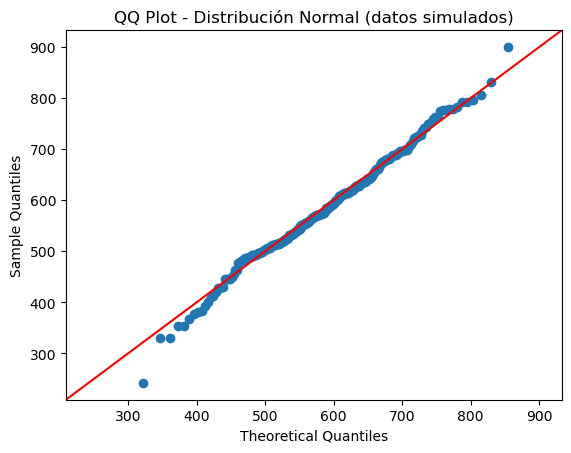

Error cuadratico medio: 9.712127625281354


In [7]:
qqplot = sm.qqplot(data = vals, dist=stats.norm, loc=588, scale=100, line="45")
plt.title('QQ Plot - Distribución Normal (datos simulados)')
plt.show()

#Calculando valores
cuantiles_observados = qqplot.axes[0].lines[0].get_xdata()
cuantiles_teoricos = qqplot.axes[0].lines[0].get_ydata()

#Calculando error
tuplas_cuantiles = list(zip(cuantiles_teoricos, cuantiles_observados))
suma_cuadrados = sum((x - y) ** 2 for x, y in tuplas_cuantiles)

error = suma_cuadrados / len(data_frame['Consumo (kg)'])
RMSE_norm_sim = math.sqrt(error)

print(f'Error cuadratico medio: {RMSE_norm_sim}')

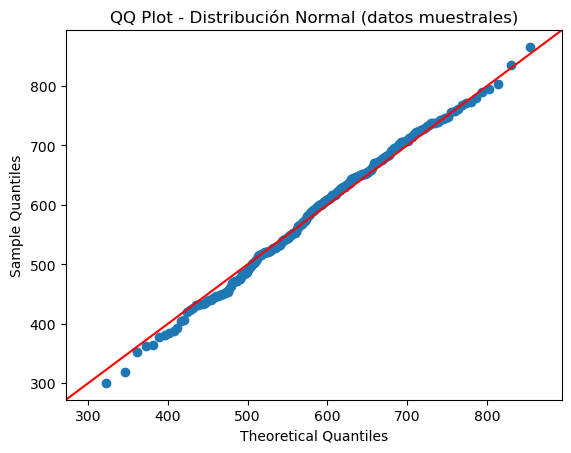

Error cuadratico medio: 9.333943230629332


In [8]:
qqplot = sm.qqplot(data = data_frame['Consumo (kg)'], dist=stats.norm, loc=588, scale=100, line="45")
plt.title('QQ Plot - Distribución Normal (datos muestrales)')
plt.show()

#Calculando valores
cuantiles_observados = qqplot.axes[0].lines[0].get_xdata()
cuantiles_teoricos = qqplot.axes[0].lines[0].get_ydata()

#Calculando error
tuplas_cuantiles = list(zip(cuantiles_teoricos, cuantiles_observados))
suma_cuadrados = sum((x - y) ** 2 for x, y in tuplas_cuantiles)

error = suma_cuadrados / len(data_frame['Consumo (kg)'])
RMSE_norm_df = math.sqrt(error)

print(f'Error cuadratico medio: {RMSE_norm_df}')

#### Distribución Gamma

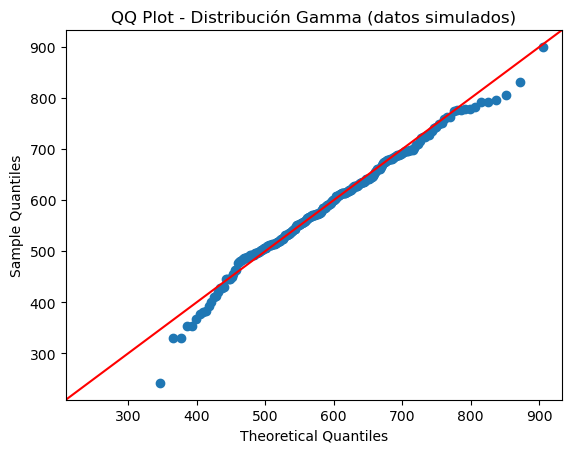

Error cuadratico medio: 12.50277810443176


In [9]:
mu = descriptivos['Consumo (kg)'][1]
mu_cuadrado = (descriptivos['Consumo (kg)'][1])**2
sigma_cuadrado = (descriptivos['Consumo (kg)'][2])**2

alpha = mu_cuadrado/sigma_cuadrado
beta = mu/sigma_cuadrado

qqplot = sm.qqplot(data = vals, dist = stats.gamma, distargs =(alpha, ), scale= 1 / beta, line ="45")
plt.title('QQ Plot - Distribución Gamma (datos simulados)')
plt.show()

#Calculando valores
cuantiles_observados = qqplot.axes[0].lines[0].get_xdata()
cuantiles_teoricos = qqplot.axes[0].lines[0].get_ydata()

#Calculando error
tuplas_cuantiles = list(zip(cuantiles_teoricos, cuantiles_observados))
suma_cuadrados = sum((x - y) ** 2 for x, y in tuplas_cuantiles)

error = suma_cuadrados / len(data_frame['Consumo (kg)'])
RMSE_gamma_sim = math.sqrt(error)

print(f'Error cuadratico medio: {RMSE_gamma_sim}')

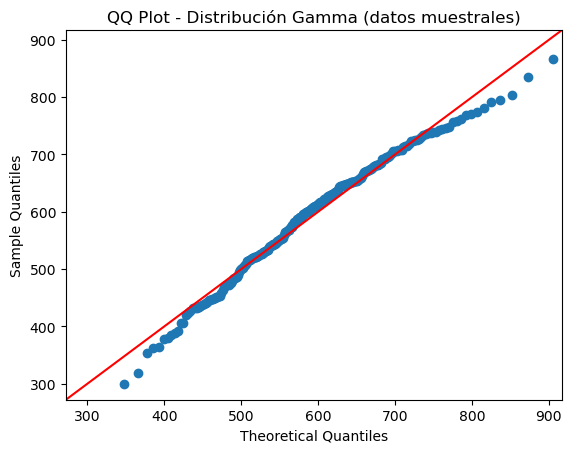

Error cuadratico medio: 13.279635030634601


In [10]:
qqplot = sm.qqplot(data = data_frame['Consumo (kg)'], dist = stats.gamma, distargs =(alpha, ), scale= 1 / beta, line ="45")
plt.title('QQ Plot - Distribución Gamma (datos muestrales)')
plt.show()

#Calculando valores
cuantiles_observados = qqplot.axes[0].lines[0].get_xdata()
cuantiles_teoricos = qqplot.axes[0].lines[0].get_ydata()

#Calculando error
tuplas_cuantiles = list(zip(cuantiles_teoricos, cuantiles_observados))
suma_cuadrados = sum((x - y) ** 2 for x, y in tuplas_cuantiles)

error = suma_cuadrados / len(data_frame['Consumo (kg)'])
RMSE_gamma_df = math.sqrt(error)

print(f'Error cuadratico medio: {RMSE_gamma_df}')

In [13]:
errores = {'ECM Normal - Datos simulados': RMSE_norm_sim , 'ECM Normal - Datos muestrales': RMSE_norm_df , 'ECM Gamma - Datos simulados': RMSE_gamma_sim, 'ECM Gamma - Datos muestrales': RMSE_gamma_df, }
errores

{'ECM Normal - Datos simulados': 9.712127625281354,
 'ECM Normal - Datos muestrales': 9.333943230629332,
 'ECM Gamma - Datos simulados': 12.50277810443176,
 'ECM Gamma - Datos muestrales': 13.279635030634601}

#### Hallazgos

Si bien los QQ plots para ambas distribuciones parecen ajustarse, al detallar como se comportan ligeramente diferente. Se puede ver que para la distribución normal tanto para los datos simulados como los datos muestrales, hay más puntos que coinciden con la linea de referencia al comparar los cuantiles teoricos y reales (tomando una escala de 100 para ajustar los datos). En ambos casos, las colas tienen valores mas altos y mas bajos de las esperadas, no se ajusta perfectamente a la distribución pero se acercan bastante.